# Rental property analysis in Germany

### Task 6.5 Unsupervised Machine Learning: Clustering



#### 1.Import Libraries
#### 2.Import Data
#### 3.Data Cleaning
#### 4.The elbow technique
#### 5.K-means Clustering

## 1. Import Libraries 

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [116]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Import Data 


In [117]:
path = r'C:\Users\marce\Documents\Apartment rental offers in Germany'

In [118]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immodata_cleaned_upd.csv'))

## 3. Data Cleaning 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206563 entries, 0 to 206562
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        206563 non-null  int64 
 1   State             206563 non-null  object
 2   Maintenance_fee   206563 non-null  int64 
 3   Heating_type      206563 non-null  object
 4   TV_offer          206563 non-null  object
 5   Newly_built       206563 non-null  bool  
 6   Balcony           206563 non-null  bool  
 7   Picture_count     206563 non-null  int64 
 8   Price_trend       206563 non-null  int64 
 9   Total_rent        206563 non-null  int64 
 10  Year_constructed  206563 non-null  int64 
 11  Kitchen           206563 non-null  bool  
 12  Cellar            206563 non-null  bool  
 13  Base_rent         206563 non-null  int64 
 14  Area(m2)          206563 non-null  int64 
 15  City              206563 non-null  object
 16  House_condition   206563 non-null  obj

In [120]:
df.head()

,Unnamed: 0,State,Maintenance_fee,Heating_type,TV_offer,Newly_built,Balcony,Picture_count,Price_trend,Total_rent,...,Base_rent,Area(m2),City,House_condition,Lift,Flat_type,Pincode,Rooms_number,Floor,Garden
0,0,Nordrhein_Westfalen,245,central_heating,ONE_YEAR_FREE,False,False,6,4,840,...,595,86,Dortmund,well_kept,False,ground_floor,44269,4,1,True
1,1,Rheinland_Pfalz,134,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3,919,...,800,89,Rhein_Pfalz_Kreis,refurbished,False,ground_floor,67459,3,2,False
2,2,Sachsen,255,floor_heating,ONE_YEAR_FREE,True,True,8,2,1300,...,965,83,Dresden,first_time_use,True,apartment,1097,3,3,False
3,3,Sachsen,58,district_heating,ONE_YEAR_FREE,False,True,9,1,919,...,343,58,Mittelsachsen_Kreis,well_kept,False,other,9599,3,3,False
4,4,Bremen,138,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2,903,...,765,84,Bremen,refurbished,False,apartment,28213,3,1,False


In [121]:
df.shape

(206563, 23)

In [122]:
#Dropping 'Unnamed' column
df.drop('Unnamed: 0', axis=1, inplace= True)

In [123]:
#Create a new Column for Price per m2
df['TotalRent_per_m2']= df['Total_rent']/df['Area(m2)']

In [124]:
#Create a new data frame with numerical variables
df_1=df[['Maintenance_fee','Picture_count','Price_trend','Total_rent','Year_constructed','Area(m2)','Rooms_number','Floor','TotalRent_per_m2']]


In [125]:
df_1.head()

,Maintenance_fee,Picture_count,Price_trend,Total_rent,Year_constructed,Area(m2),Rooms_number,Floor,TotalRent_per_m2
0,245,6,4,840,1965,86,4,1,9.767442
1,134,8,3,919,1871,89,3,2,10.325843
2,255,8,2,1300,2019,83,3,3,15.662651
3,58,9,1,919,1964,58,3,3,15.844828
4,138,19,2,903,1950,84,3,1,10.750000


In [126]:
df_1.shape

(206563, 9)

## 4. The elbow technique 

In [127]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [128]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\sklearn\clust

[-59480492702.301254,
 -28783525166.846542,
 -17776225825.8413,
 -11087504526.618206,
 -8131037630.104049,
 -6489983402.788147,
 -5310631855.357977,
 -4271247491.1617994,
 -3583538404.682082]

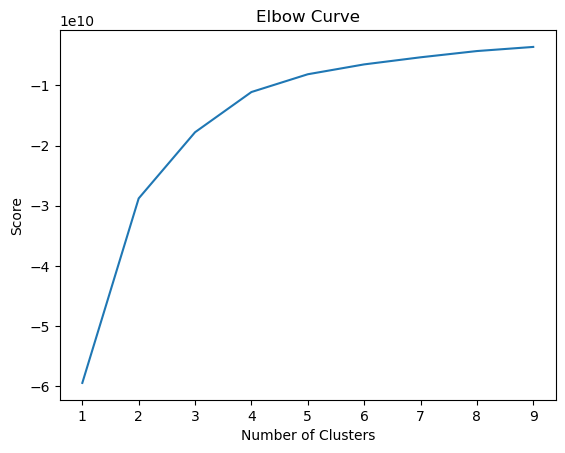

In [129]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal number of clusters is 3 . The elbow jumps rapidly from two to three  ,on the x-axis , then rises only slightly after three.

## 5. K-means  clustering

In [130]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [131]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

C:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [132]:
df_1['clusters'] = kmeans.fit_predict(df_1)

C:\Users\marce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marce\AppData\Local\Temp\ipykernel_1532\2087946470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['clusters'] = kmeans.fit_predict(df_1)


In [133]:
df_1.head()


,Maintenance_fee,Picture_count,Price_trend,Total_rent,Year_constructed,Area(m2),Rooms_number,Floor,TotalRent_per_m2,clusters
0,245,6,4,840,1965,86,4,1,9.767442,1
1,134,8,3,919,1871,89,3,2,10.325843,1
2,255,8,2,1300,2019,83,3,3,15.662651,1
3,58,9,1,919,1964,58,3,3,15.844828,1
4,138,19,2,903,1950,84,3,1,10.750000,1


In [134]:
df_1['clusters'].value_counts()

0    106759
1     89522
2     10282
Name: clusters, dtype: int64

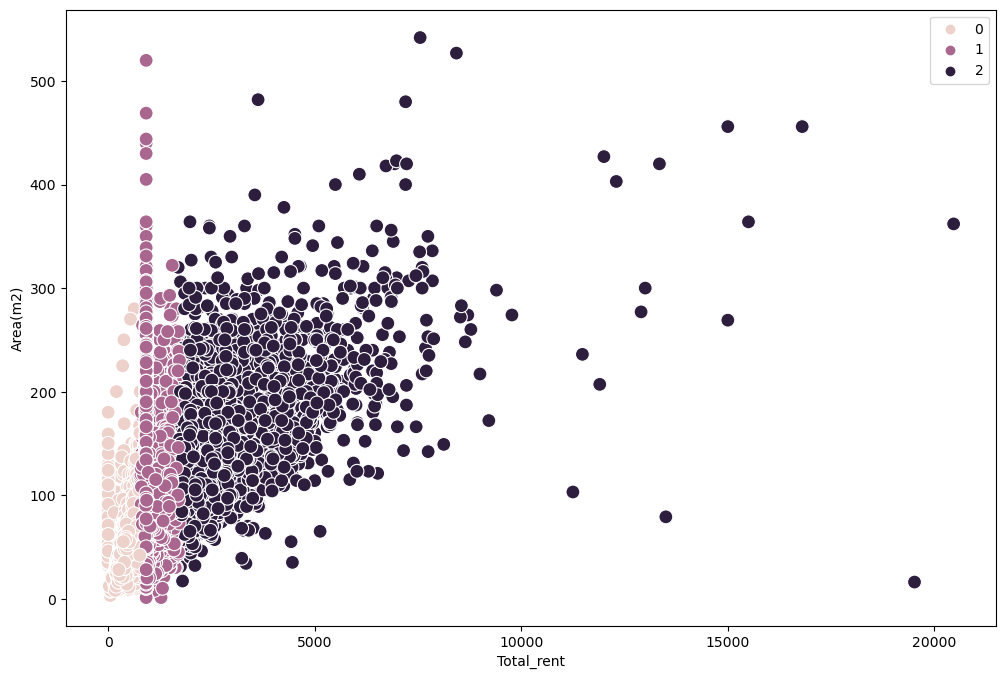

In [135]:
# Plot the clusters for the "Total_rent" and "Area(m2)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['Total_rent'], y=df['Area(m2)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total_rent') # Label x-axis.
plt.ylabel('Area(m2)') # Label y-axis.
plt.show()

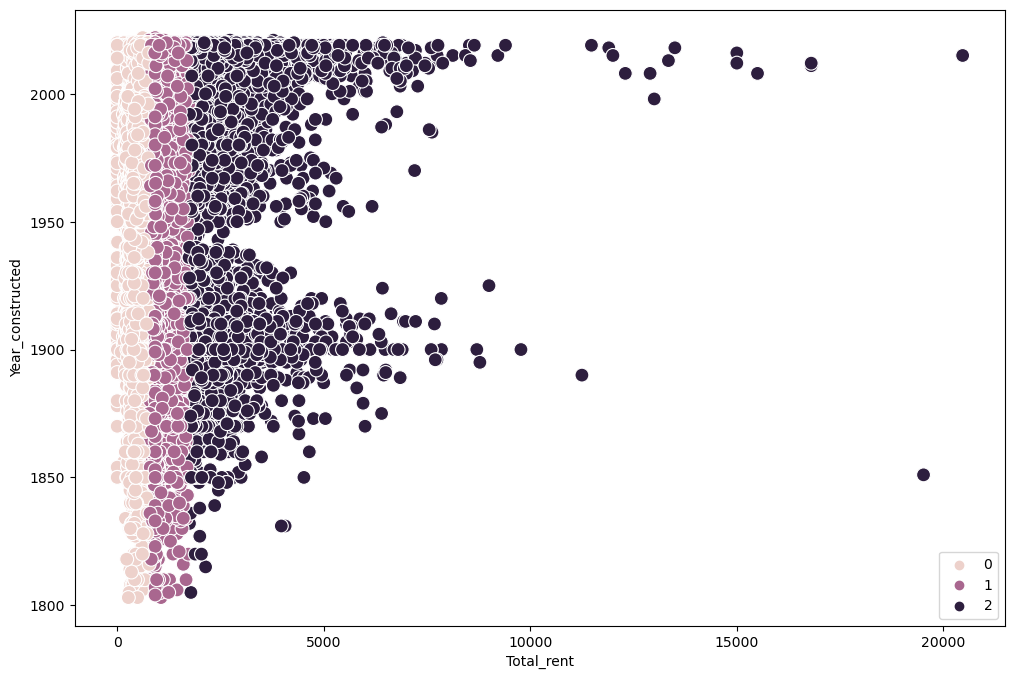

In [136]:
# Plot the clusters for the "Total_rent" and "Year_constructed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['Total_rent'], y=df['Year_constructed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total_rent') 
plt.ylabel('Year_constructed') 
plt.show()

### The most populated cluster is cluster 2 (dark purple). It gathers the data points with higher prices for the Total Rent  and it is very rarely found in very old buidlings unde 1850s.

In [137]:
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\marce\AppData\Local\Temp\ipykernel_1532\3653440031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'dark purple'


In [139]:
df_1.groupby('cluster').agg({'Maintenance_fee':['mean', 'median'], 
                         'Picture_count':['mean', 'median'], 
                         'Price_trend':['mean', 'median'],
                           'Total_rent':['mean', 'median'],
                           'Year_constructed':['mean', 'median'],
                          'Area(m2)':['mean', 'median'],
                             'Rooms_number':['mean', 'median'],
                            'Floor':['mean', 'median'],
                            'TotalRent_per_m2':['mean', 'median']})
     

Maintenance_fee        Picture_count        Price_trend         \
                       mean median          mean median        mean median   
cluster                                                                      
dark purple      333.500000  300.0     14.631589   13.0    4.849932    5.0   
pink             115.813318  113.0      8.499218    8.0    2.275611    2.0   
purple           177.482127  170.0     10.708318   10.0    3.483557    3.0   

              Total_rent         Year_constructed            Area(m2)         \
                    mean  median             mean  median        mean median   
cluster                                                                        
dark purple  2422.738767  2112.0      1982.851877  2010.0  136.893503  130.0   
pink          509.462425   500.0      1958.978859  1966.0   58.081670   58.0   
purple       1041.992393   919.0      1976.930598  1983.0   84.938306   82.0   

            Rooms_number            Floor        TotalRent_per_m2             
                    mean median      mean median             mean     median  
cluster                                                                       
dark purple     3.732348    4.0  2.502140    2.0        18.666184  17.481199  
pink            2.283536    2.0  2.163602    2.0         9.219386   8.450000  
purple          2.856024    3.0  1.990930    2.0        13.621923  12.584681

### The dark purple cluster  has the highest  stats in almost all categories. It has the highest Maintenance_fee, the highest price_trend, total_rent, the largest area and the highest number in Rooms_number and the most new buildings.                                                                                                                                                                                  At the  second place after Total_rent is the purple cluster, which has a smaller area, fewer rooms and lower maintenance_fee and older buildings.                                                                                                                                      And the lowest statistics represent the pink cluster, which has the lowest prices, the smallest area and the oldest buildings.





